# Data Visualizatio with matplotlib

This notebook gathers the codes for visualization with matplotlib package and is designed with three sections.
- Basic Plot: Start to use the package with basic plots to illustrate the ideas of using matplotlig. 
- Project: A compact project to visualize CO2 emission per capita in selected countries and demonstrate more useful codes with real examples. 
- Visualization on a 2D Plan: This section demonstrates another level of visuals that generates cool kaleidoscope-like images from mathmetical matrix. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Basic Plots

In [2]:
# To replace this section with real data
# https://www.kaggle.com/ibrahimmukherjee/gdp-world-bank-data

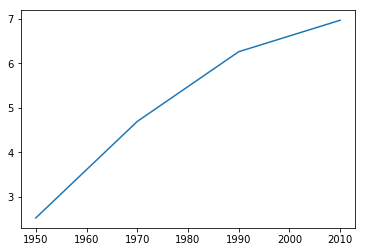

In [3]:
year = [1950, 1970, 1990, 2010]
pop = [2.519, 4.692, 6.263, 6.972]
plt.plot(year, pop)
plt.show()

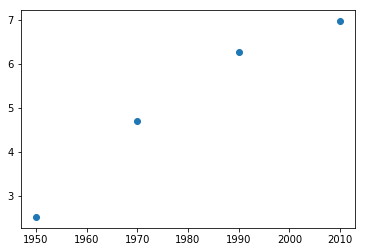

In [4]:
plt.scatter(year, pop)
plt.show()

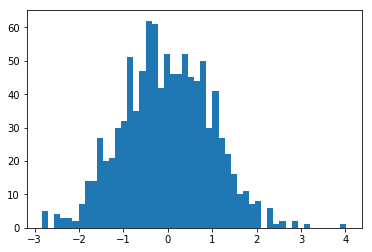

In [5]:
values = np.random.normal(0, 1, 1000)
plt.hist(values, bins = 50)
plt.show()

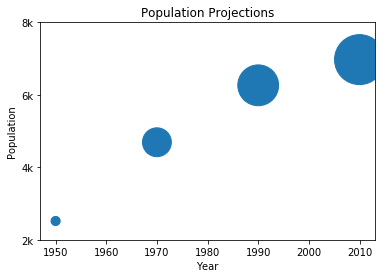

In [6]:
# size
wages_k = [1000/12, 10000/12, 20000/12, 30000/12]
plt.scatter(year, pop, s = wages_k)

# Customizations
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Projections')
tick_val = [2,4,6,8]
tick_lab = ['2k', '4k', '6k', '8k']
plt.yticks(tick_val, tick_lab)

plt.show()

In [7]:
# # Color - needs larger dataset for example; Only show codes below
# col = {
#     'Asia': 'red',
#     'Europe': 'green',
#     'Africa': 'blue',
#     'Americas': 'yellow',
#     'Oceania': 'black'
# }

# plt.scatter(year, pop, s = wages_k, c = col, alpha = 0.8)

In [8]:
# # Add text
# plt.text(x, y, 'text')

# # Add grid() call
# plt.grid(True)

## Data Visualization Project

### Data preparation

The dataset has been pre-explored to get "CO2 emissions (metric tons per capita)" in United States, European Union, and Japan

In [9]:
df = pd.read_csv('C:\\Users\\byron\\Desktop\\data\\Indicators.csv')

In [10]:
df = df[(df.CountryName.isin(['United States', 'European Union', 'Japan'])) & 
        (df.IndicatorName == 'CO2 emissions (metric tons per capita)')]
df.CountryName.unique()

array(['European Union', 'Japan', 'United States'], dtype=object)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 800 to 5194727
Data columns (total 6 columns):
CountryName      156 non-null object
CountryCode      156 non-null object
IndicatorName    156 non-null object
IndicatorCode    156 non-null object
Year             156 non-null int64
Value            156 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 8.5+ KB


In [12]:
df.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
800,European Union,EUU,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,5.762829
12814,Japan,JPN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,2.516538
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
24109,European Union,EUU,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,5.922976
37914,Japan,JPN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,2.981979


In [13]:
### Data Transformation
co2 = df.pivot_table(index='Year', columns='CountryCode', values='Value')
co2.head()

CountryCode,EUU,JPN,USA
Year,,,
1960,5.762829,2.516538,15.999779
1961,5.922976,2.981979,15.681256
1962,6.210078,3.059736,16.013937
1963,6.574756,3.359321,16.482762
1964,6.791063,3.673035,16.968119


### Data Visulization
#### Graphs on common axes

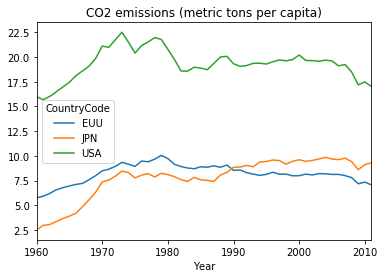

In [14]:
co2.plot()
plt.title('CO2 emissions (metric tons per capita)')
plt.show()

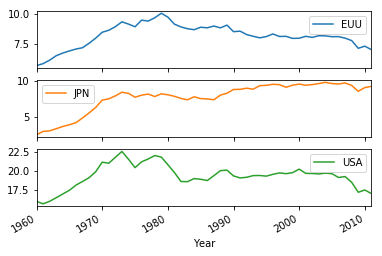

In [15]:
co2.plot(subplots=True)
plt.show()

#### Using axes()

Syntax: axes([x_lo, y_lo, width, height])

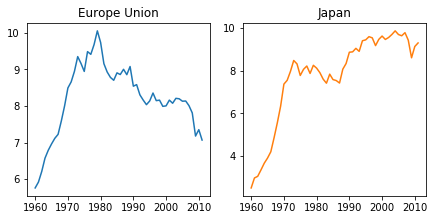

In [16]:
plt.axes([0.05, 0.05, 0.425, 0.6])
plt.plot(co2.EUU, 'C0')
plt.title('Europe Union')
plt.axes([0.55, 0.05, 0.425, 0.6])
plt.plot(co2.JPN, 'C1')
plt.title('Japan')
plt.show()

### Using subplot()

Syntax: subplot(nrows, ncols, nsubplot)

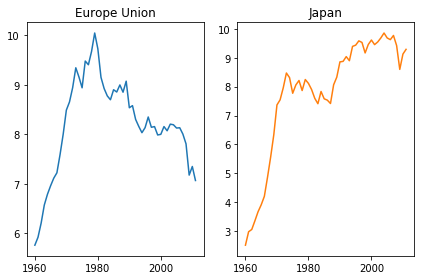

In [17]:
plt.subplot(1,2,1)
plt.plot(co2.EUU, 'C0')
plt.title('Europe Union')
plt.subplot(1,2,2)
plt.plot(co2.JPN, 'C1')
plt.title('Japan')
plt.tight_layout()
plt.show()

### Customizing axes

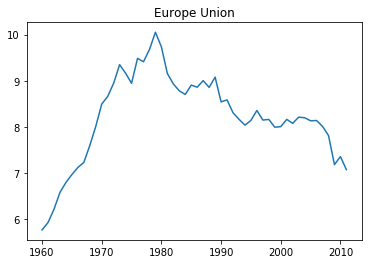

In [18]:
plt.plot(co2.EUU)
plt.title('Europe Union')
plt.show()

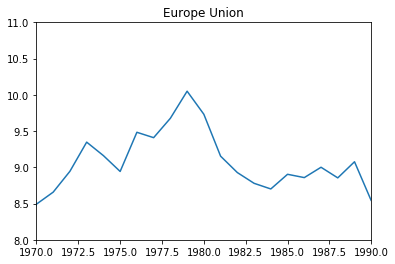

In [19]:
plt.plot(co2.EUU)
plt.title('Europe Union')
plt.xlim((1970, 1990))
plt.ylim(((8, 11)))
plt.show()

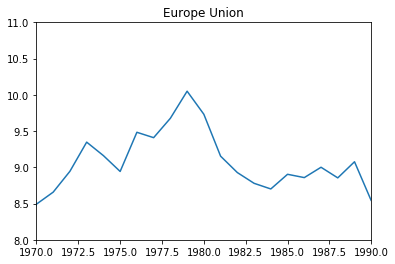

In [20]:
plt.plot(co2.EUU)
plt.title('Europe Union')
plt.axis((1970, 1990, 8, 11))
plt.show()

### Legend & Plot Styles

Pass a string to label argument in plot() to assign name to legend.

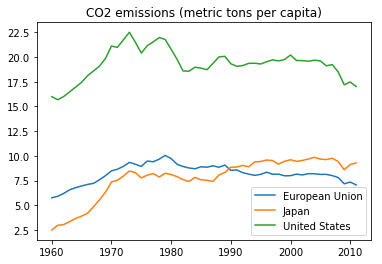

In [21]:
plt.plot(co2.EUU, 'C0', label='European Union')
plt.plot(co2.JPN, 'C1', label='Japan')
plt.plot(co2.USA, 'C2', label='United States')
plt.title('CO2 emissions (metric tons per capita)')
plt.legend(loc='lower right')
plt.show()

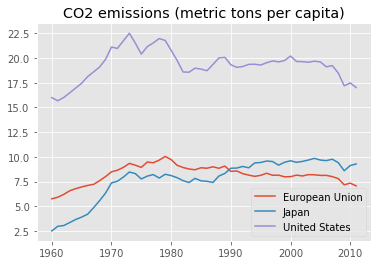

In [22]:
plt.style.use('ggplot')
plt.plot(co2.EUU, 'C0', label='European Union')
plt.plot(co2.JPN, 'C1', label='Japan')
plt.plot(co2.USA, 'C2', label='United States')
plt.title('CO2 emissions (metric tons per capita)')
plt.legend(loc='lower right')
plt.show()

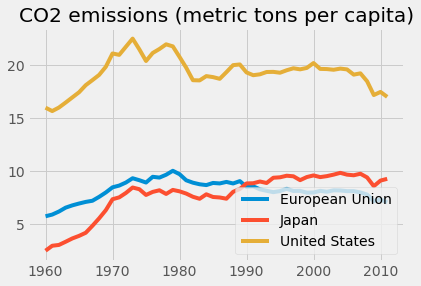

In [23]:
plt.style.use('fivethirtyeight')
plt.plot(co2.EUU, 'C0', label='European Union')
plt.plot(co2.JPN, 'C1', label='Japan')
plt.plot(co2.USA, 'C2', label='United States')
plt.title('CO2 emissions (metric tons per capita)')
plt.legend(loc='lower right')
plt.show()

## Visulization on a 2D Plan

In [24]:
u = np.linspace(-2, 2, 3)
v = np.linspace(-1, 1, 5)
X,Y = np.meshgrid(u, v)
Z = X**2/25 + Y**2/4

In [25]:
# u and v are a 3 * 1 array
print(u.shape, u, v.shape, v)

(3,) [-2.  0.  2.] (5,) [-1.  -0.5  0.   0.5  1. ]


In [26]:
# np.meshgrid(v, v) returns two 5 * 3 2D arrays, X and Y
print(X.shape, '\n', X, '\n', Y.shape, '\n', Y)

(5, 3) 
 [[-2.  0.  2.]
 [-2.  0.  2.]
 [-2.  0.  2.]
 [-2.  0.  2.]
 [-2.  0.  2.]] 
 (5, 3) 
 [[-1.  -1.  -1. ]
 [-0.5 -0.5 -0.5]
 [ 0.   0.   0. ]
 [ 0.5  0.5  0.5]
 [ 1.   1.   1. ]]


In [27]:
# Z is a function of x**2/25 for x in X and y**2/4 for y in Y
Z

array([[ 0.41  ,  0.25  ,  0.41  ],
       [ 0.2225,  0.0625,  0.2225],
       [ 0.16  ,  0.    ,  0.16  ],
       [ 0.2225,  0.0625,  0.2225],
       [ 0.41  ,  0.25  ,  0.41  ]])

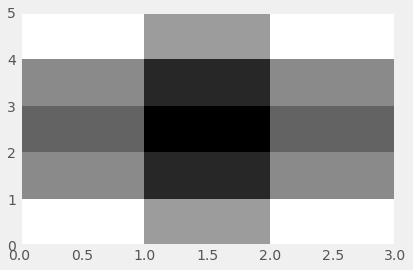

In [28]:
plt.set_cmap('gray')
plt.pcolor(Z)
plt.show()

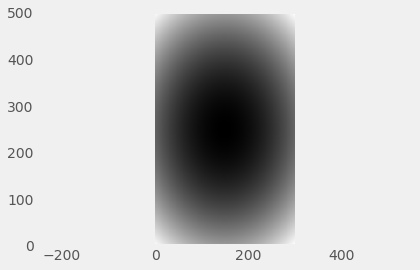

In [29]:
u = np.linspace(-2, 2, 300)
v = np.linspace(-1, 1, 500)
X,Y = np.meshgrid(u, v)
Z = X**2/25 + Y**2/4

plt.set_cmap('gray')
plt.pcolor(Z)
plt.axis('equal')
plt.show()

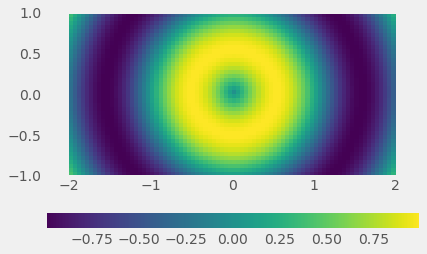

In [30]:
plt.clf()
u = np.linspace(-2, 2, 81)
v = np.linspace(-1, 1, 41)

X,Y = np.meshgrid(u,v)
Z = np.sin(3*np.sqrt(X**2 + Y**2)) 
plt.pcolor(X, Y, Z, cmap='viridis') # Pass X and Y to set axis
plt.axis('equal')
plt.colorbar(orientation='horizontal')
plt.show()

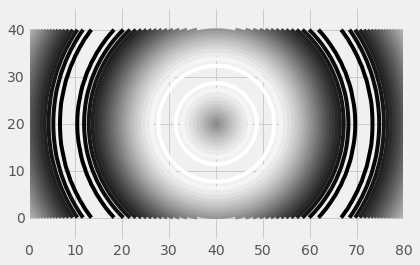

In [31]:
plt.contour(Z, 30)
plt.axis('equal')
plt.show()

In [32]:
X, Y = np.meshgrid(np.arange(-50,51), np.arange(-50, 51))
Z = np.sin(3*np.sqrt(X**2 + Y**2))

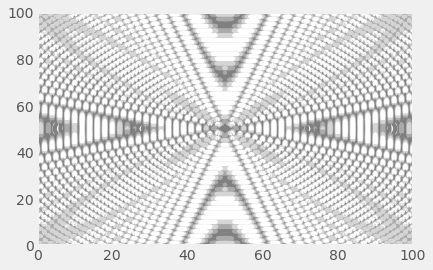

In [33]:
plt.contour(Z)
plt.show()